In [41]:
import re
from time import time
from traceback import print_tb 

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
from datetime import datetime
import dateutil
#energy file
watt_file = open("LOGS/watt_log", "r")

corto_encoder = open("LOGS/corto_encoder_log", "r")
corto_decoder = open("LOGS/corto_encoder_log", "r")
draco_encoder = open("LOGS/draco_encoder_log", "r")
draco_decoder = open("LOGS/draco_decoder_log", "r")

def statistics(file_reader , state):
    first_line = False
    start_time_stamp = None
    number_of_times = 0 # number of times process have been called 
    ms_passed = 0 
    for lines in file_reader:
        if not first_line:
            first_line = True
            start_time_stamp = lines
        else:
            number_of_times += 1
            integers =  re.findall(r'\d+', str(lines))
            if( state == "corto_decode"):
                ms_passed += int(integers[1])
            else:
                print( integers[0])
                ms_passed += int(integers[0])

    seconds_passed = int(ms_passed / 1000) 
    ms_passed = ms_passed % 1000
    start_time = re.findall(r'\d+', str(start_time_stamp))
    
    start_time[0] = int(start_time[0])
    start_time[1] = int(start_time[1])
    start_time[2] = int(start_time[2])
    start_time[3] = int(start_time[3])
    curr_time = start_time.copy()
    #ms
    curr_time[3] *= 10
    curr_time[3] += ms_passed 
    if curr_time[3] > 1000:
        seconds_passed += 1 
        curr_time[3] -= 1000
    #s
    curr_time[2] += seconds_passed
    if curr_time[2] >= 60:
        curr_time[1] += int(curr_time[2] / 60)
        curr_time[2] = curr_time[2] % 60  
    
    if curr_time[1] >= 60:
        curr_time[0] += 1
        curr_time[1] =  curr_time[1] % 60

    

    return ( str(start_time[0]) + ":"+ str(start_time[1]) +":"+str(start_time[2]) + "." + str(start_time[3]) )  , ( str(curr_time[0]) + ":"+ str(curr_time[1]) +":"+str(curr_time[2]) + "." + str(curr_time[3]) ) , number_of_times  

draco_encode_start_time , draco_encode_end_time , draco_encode_number_of_times  = statistics(draco_encoder , "draco_encode") 
draco_decode_start_time , draco_decode_end_time , draco_decode_number_of_times = statistics(draco_decoder , "draco_decode")
corto_encode_start_time , corto_encode_end_time , corto_encode_number_of_times= statistics(corto_encoder , "corto_encode" )
corto_decode_start_time , corto_decode_end_time , corto_decode_number_of_times= statistics(corto_decoder , "corto_decode")


print( draco_decode_start_time , draco_decode_end_time , draco_decode_number_of_times )

def get_data_index(start_time , end_time , timestamp_watt):
    print(start_time)
    start_index =0
    end_index =0
    temp_time = datetime.strptime( "0:0:0.1" , '%H:%M:%S.%f')
    start_dif = datetime.strptime( start_time , '%H:%M:%S.%f')
    start_dif -= temp_time
    end_dif = datetime.strptime( start_time , '%H:%M:%S.%f')
    end_dif -= temp_time
    i = 0
    t_s = start_time
    t_e = end_time
    print("start dif " , start_dif )
    print("end dif " , end_dif )

    for timestamp in timestamp_watt:
        start_time = t_s
        end_time = t_e
        split_char = '.'
        print("start time " , start_time )
        start_time = datetime.strptime( str(start_time) , '%H:%M:%S.%f')
        print( "end time " , end_time)
        end_time = datetime.strptime( str(end_time) , '%H:%M:%S.%f')
        timestamp = datetime.strptime( str(timestamp) , '%H:%M:%S.%f')

        dif_start = abs( start_time - timestamp )
        dif_end = abs(end_time - timestamp)
        if dif_start < start_dif:
            start_dif = dif_start
            start_index =  i
        if dif_end < end_dif:
            end_dif = dif_end
            end_index = i  
        i += 1 
    return start_index , end_index 

def calculate_energy(start_index , end_index  , watt_timestamp ,  watt_arr ):
    index =  start_index
    total_energy = 0 
    while( index < end_index  ):
        total_energy += watt_arr[index]
        index += 1 
    time_passed = (watt_timestamp[end_index] - watt_timestamp[start_index] )
    print( watt_timestamp[end_index] , watt_timestamp[start_index ] , "time passed" , time_passed )
    return total_energy / time

timestamps_watt = []
energy_watt = []
# process watt
for lines in watt_file:
    integers = re.findall(r'\d+', str(lines))    
    timestamps_watt.append( str(integers[0]) + ":"+ str(integers[1]) +":"+str(integers[2]) + "." + str(integers[3])  )    
    energy_watt.append( int(integers[4]) + float(integers[5])/10.0 )


20
17
16
18
21
21
21
23
22
22
21
22
21
21
22
21
23
21
21
22
21
22
21
22
22
22
21
21
17
20
17
22
27
27
22
24
23
21
22
21
21
22
21
21
21
22
22
22
22
22
21
23
22
22
20
18
18
17
21
22
22
22
21
22
21
21
21
21
21
21
22
23
21
22
22
22
21
22
21
22
21
22
17
18
16
21
23
21
21
23
22
22
21
23
21
21
21
21
23
22
21
23
24
24
21
22
21
21
25
18
17
17
21
22
22
23
21
21
22
21
22
21
22
21
22
22
21
21
21
21
22
21
22
22
22
21
18
17
21
21
21
22
21
23
22
21
21
23
22
21
22
21
21
21
25
24
21
23
23
20
22
22
24
21
17
17
21
21
22
25
21
21
23
22
22
21
21
22
21
22
23
20
24
21
22
21
21
22
21
22
17
18
17
21
21
22
21
22
21
23
22
24
21
21
23
21
21
21
22
22
21
22
21
23
21
22
22
17
17
18
23
23
24
21
22
22
23
22
22
21
22
22
22
21
22
22
22
21
21
21
22
22
8
9
8
9
9
8
8
7
7
7
7
7
7
8
10
11
9
9
9
10
9
9
9
8
10
8
9
8
8
8
9
8
8
9
9
10
10
11
10
10
11
10
9
9
9
9
9
8
8
8
9
9
8
8
9
8
8
9
9
9
9
8
9
8
9
10
8
9
9
9
9
9
9
9
8
7
7
7
7
7
7
7
8
9
9
9
10
9
9
9
9
10
8
8
9
9
9
8
8
9
8
9
9
9
10
10
10
10
10
8
8
8
8
9
8
10
8
9
8
8
9
10
11
9
9
10

In [42]:

#read socket files
f_ = open( "LOGS/timestamps_forsending_ply.txt")
polygon_start_time = f_.readline()
polygon_end_time = f_.readline()
print(polygon_start_time)
start_index_polygon_send , end_index_polygon_send = get_data_index(polygon_start_time[:len(polygon_start_time)-2] , polygon_end_time[:len(polygon_start_time)-2] , timestamps_watt)
f_ = open( "LOGS/timestamps_forsending_drc.txt")
draco_compress_start_time = f_.readline()
draco_compress_end_time = f_.readline()
start_index_polygon_draco_send , end_index_polygon_draco_send = get_data_index(draco_compress_start_time[:len(polygon_start_time)-2] , draco_compress_end_time[:len(polygon_start_time)-2] , timestamps_watt)
f_ = open( "LOGS/timestamps_forsending_crt.txt")
corto_compress_start_time = f_.readline()
corto_compress_end_time = f_.readline()
start_index_polygon_corto_send , end_index_polygon_corto_send = get_data_index(corto_compress_start_time[:len(polygon_start_time)-2] , corto_compress_end_time[:len(polygon_start_time)-2] , timestamps_watt)

11:4:12.950

11:4:12.95
start dif  11:04:12.850000
end dif  11:04:12.850000
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45
start time  11:4:12.95
end time  11:4:26.45


In [43]:
print(draco_decode_end_time)
start_index_draco_encode , end_index_draco_encode = get_data_index(draco_encode_start_time , draco_encode_end_time , timestamps_watt)
start_index_draco_decode , end_index_draco_decode = get_data_index(draco_decode_start_time , draco_decode_end_time , timestamps_watt)
start_index_corto_encode , end_index_corto_encode = get_data_index(corto_encode_start_time , corto_encode_end_time , timestamps_watt)
start_index_corto_decode , end_index_corto_decode = get_data_index(corto_decode_start_time , corto_decode_end_time , timestamps_watt)





11:3:38.36
11:3:12.54
start dif  11:03:12.440000
end dif  11:03:12.440000
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end time  11:3:17.701
start time  11:3:12.54
end

corto encode  9101


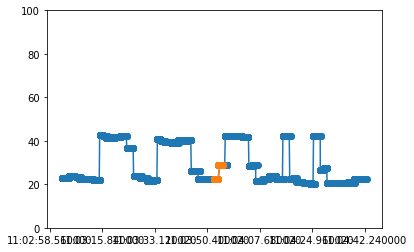

timestamp  738661.460446875 738661.461058912


In [44]:
#corto encode 
print("corto encode " , start_index_corto_encode)
ax = plt.gca()
xfmt = md.DateFormatter('%H:%M:%S.%f')
ax.xaxis.set_major_formatter(xfmt)
timestamps_watt = matplotlib.dates.datestr2num(timestamps_watt)
ax.set_ylim([0 , 100])
plt.plot( timestamps_watt , energy_watt , "-o")
plt.plot( timestamps_watt[start_index_corto_encode : end_index_corto_encode] , energy_watt[start_index_corto_encode : end_index_corto_encode] ,   "-o")

plt.show()
print("timestamp " , timestamps_watt[0] , timestamps_watt[end_index_corto_encode])
#calculate_energy(start_index_corto_encode , end_index_corto_encode , timestamps_watt , energy_watt )

In [48]:
#draco encode
ax = plt.gca()
ax.set_ylim([0 , 100])
plt.plot( timestamps_watt , energy_watt , "-o")
plt.plot( timestamps_watt[start_index_corto_decode : end_index_corto_decode] , energy_watt[start_index_corto_decode : end_index_corto_decode] ,   "-o")

plt.show()

corto decode  9101 16820
16860


TypeError: Parser must be a string or character stream, not float64

ValueError: DateFormatter found a value of x=0, which is an illegal date; this usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

<Figure size 432x288 with 1 Axes>

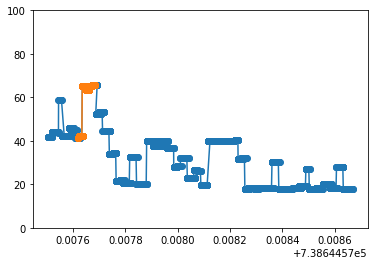

In [ ]:
#draco encode
ax = plt.gca()
ax.set_ylim([0 , 100])
plt.plot( timestamps_watt , energy_watt , "-o")
plt.plot( timestamps_watt[start_index_draco_encode : end_index_draco_encode] , energy_watt[start_index_draco_encode : end_index_draco_encode] ,   "-o")

plt.show()

4990 6528


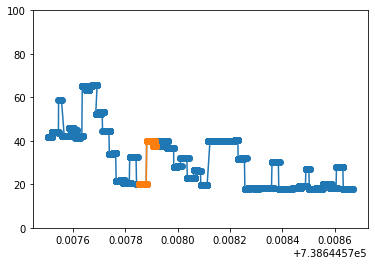

In [ ]:
#draco decode 
ax = plt.gca()
ax.set_ylim([0 , 100])
plt.plot( timestamps_watt , energy_watt , "-o")
plt.plot( timestamps_watt[start_index_draco_decode : end_index_draco_decode] , energy_watt[start_index_draco_decode : end_index_draco_decode] ,   "-o")
print(start_index_draco_decode , end_index_draco_decode)
plt.show()


13564 13669


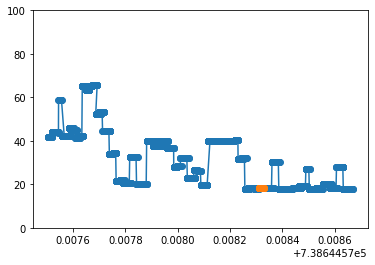

In [ ]:
#normal polygon send 
ax = plt.gca()
ax.set_ylim([0 , 100])
plt.plot( timestamps_watt , energy_watt , "-o")
print(start_index_polygon_send , end_index_polygon_send)
plt.plot( timestamps_watt[ start_index_polygon_send: end_index_polygon_send] , energy_watt[start_index_polygon_send : end_index_polygon_send] ,   "-o")
plt.show()

15057 15176


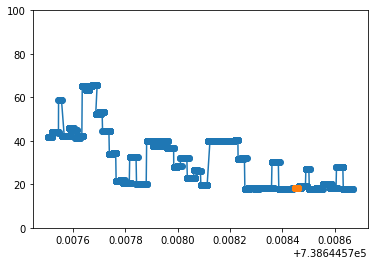

In [ ]:
#compressed with draco send 
ax = plt.gca()
ax.set_ylim([0 , 100])
plt.plot( timestamps_watt , energy_watt , "-o")
print(start_index_polygon_draco_send , end_index_polygon_draco_send)
plt.plot( timestamps_watt[ start_index_polygon_draco_send :end_index_polygon_draco_send] , energy_watt[start_index_polygon_draco_send :end_index_polygon_draco_send] ,   "-o")
plt.show()

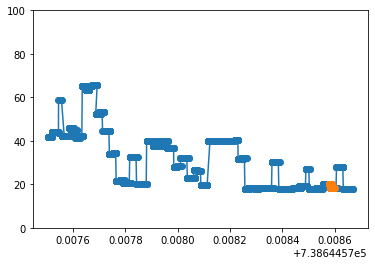

In [ ]:
#compressed with corto send 
ax = plt.gca()
ax.set_ylim([0 , 100])
plt.plot( timestamps_watt , energy_watt , "-o")
plt.plot( timestamps_watt[ start_index_polygon_corto_send : end_index_polygon_corto_send] , energy_watt[start_index_polygon_corto_send : end_index_polygon_corto_send] ,   "-o")
plt.show()